In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:

df=pd.read_csv('./nombre_depanes_par_jour.csv', encoding='latin-1',sep=";",index_col="Date début", parse_dates=True)

In [3]:
df.head()

,Number of Orders
Date début,
2019-01-01,9.0
2019-01-02,9.0
2019-01-03,15.0
2019-01-04,8.0
2019-01-05,7.0


In [4]:
df=df.asfreq("D")

df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10'],
              dtype='datetime64[ns]', name='Date début', length=1165, freq='D')

In [5]:
df.tail()

,Number of Orders
Date début,
2022-03-06,0.0
2022-03-07,3.0
2022-03-08,4.0
2022-03-09,6.0
2022-03-10,1.0


In [6]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df, order=(7,1,7))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:       Number of Orders   No. Observations:                 1165
Model:                 ARIMA(7, 1, 7)   Log Likelihood               -3658.086
Date:                Fri, 24 May 2024   AIC                           7346.171
Time:                        16:43:54   BIC                           7422.065
Sample:                    01-01-2019   HQIC                          7374.803
                         - 03-10-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7855      0.045    -17.452      0.000      -0.874      -0.697
ar.L2         -0.8236      0.038    -21.916      0.000      -0.897      -0.750
ar.L3         -0.7905      0.043    -18.310      0.0

C:\Users\mahdi\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

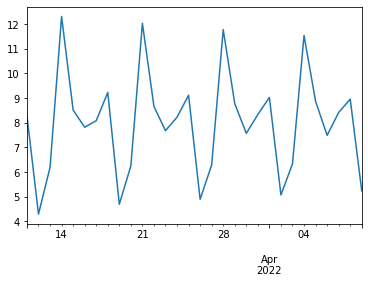

In [7]:
forecast_test = model_fit.forecast(30)

df1= forecast_test

df1.plot()

In [8]:
df1.tail()

2022-04-05    8.868716
2022-04-06    7.486690
2022-04-07    8.414005
2022-04-08    8.956315
2022-04-09    5.234464
Freq: D, Name: predicted_mean, dtype: float64

In [9]:
df1.to_csv('forcast.csv', index=True, encoding='latin-1',sep=";") 

In [10]:
df=pd.read_csv('./forcast.csv', encoding='latin-1',sep=";")

In [11]:
df.head()

,Unnamed: 0,predicted_mean
0,2022-03-11,8.285812
1,2022-03-12,4.293431
2,2022-03-13,6.187384
3,2022-03-14,12.308410
4,2022-03-15,8.514153


In [12]:
df.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [13]:
df.rename(columns={'predicted_mean':'arima-man'}, inplace=True)

In [14]:
df.head()

,date,arima-man
0,2022-03-11,8.285812
1,2022-03-12,4.293431
2,2022-03-13,6.187384
3,2022-03-14,12.308410
4,2022-03-15,8.514153


In [15]:
df.to_csv('forcast.csv', index=False, encoding='latin-1',sep=";") 

In [16]:
df=pd.read_csv('./forcast.csv', encoding='latin-1',sep=";",index_col="date", parse_dates=True)

In [17]:
df1=pd.read_csv('./nombre_depanes_par_jour.csv', encoding='latin-1',sep=";",index_col="Date début", parse_dates=True)

In [18]:
df1.head()

,Number of Orders
Date début,
2019-01-01,9.0
2019-01-02,9.0
2019-01-03,15.0
2019-01-04,8.0
2019-01-05,7.0


In [19]:
import pmdarima as pm
sarima= pm.auto_arima(df1, m=7)

<AxesSubplot:xlabel='date'>

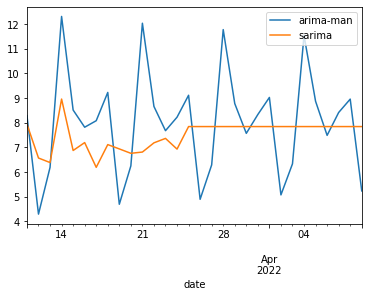

In [20]:
forecast_sarima = sarima.predict(n_periods=len(df))
df['sarima'] = list(forecast_sarima)

df.plot()

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [22]:
ses= SimpleExpSmoothing(np.asarray(df1['Number of Orders']))

In [23]:
ses_fit=ses.fit(optimized=True)

<AxesSubplot:xlabel='date'>

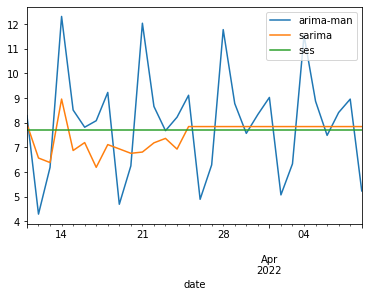

In [24]:
y_pred= ses_fit.forecast(len(df))
df['ses'] = list(y_pred)
df.plot()

In [25]:
from xgboost import XGBRegressor

In [26]:
xg_reg=XGBRegressor()

In [27]:
df3=pd.read_csv('./forcast.csv', encoding='latin-1',sep=";",index_col="date", parse_dates=True)

In [28]:
df3.head()

,arima-man
date,
2022-03-11,8.285812
2022-03-12,4.293431
2022-03-13,6.187384
2022-03-14,12.308410
2022-03-15,8.514153


In [29]:
df1.insert(0,'null','')
df1['null'] = 0
df3.insert(0,'null','')
df3['null'] = 0

In [30]:
xg_fit=xg_reg.fit(df1.drop(['Number of Orders'], axis=1),df1['Number of Orders'])

In [31]:
 y_pred=xg_fit.predict(df3.drop(['arima-man'], axis=1))

In [32]:
df['xgboost'] =  list(y_pred)

In [33]:
df.head()

,arima-man,sarima,ses,xgboost
date,,,,
2022-03-11,8.285812,7.941279,7.715774,8.193992
2022-03-12,4.293431,6.568061,7.715774,8.193992
2022-03-13,6.187384,6.383874,7.715774,8.193992
2022-03-14,12.308410,8.958419,7.715774,8.193992
2022-03-15,8.514153,6.873199,7.715774,8.193992


In [34]:
df.to_csv('forcast.csv', index=True, encoding='latin-1',sep=";") 

In [35]:
df=pd.read_csv('./forcast.csv', encoding='latin-1',sep=";",index_col="date", parse_dates=True)

In [36]:
df.head()

,arima-man,sarima,ses,xgboost
date,,,,
2022-03-11,8.285812,7.941279,7.715774,8.193992
2022-03-12,4.293431,6.568061,7.715774,8.193992
2022-03-13,6.187384,6.383874,7.715774,8.193992
2022-03-14,12.308410,8.958419,7.715774,8.193992
2022-03-15,8.514153,6.873199,7.715774,8.193992


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2022-03-11 to 2022-04-09
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   arima-man  30 non-null     float64
 1   sarima     30 non-null     float64
 2   ses        30 non-null     float64
 3   xgboost    30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB
